# Clustering K-means

## 1. Lectura de los datos y unión de los datasets

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

C:\Users\Andrea\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Andrea\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Andrea\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Andrea\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Andrea\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Andrea\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "C:\Use

In [2]:
w_white=pd.read_csv('C:\\Users\\Andrea\\Desktop\\python-ml-course-master\\datasets\\wine\\winequality-white.csv', sep=';')
w_red=pd.read_csv('C:\\Users\\Andrea\\Desktop\\python-ml-course-master\\datasets\\wine\\winequality-red.csv', sep=';')

In [3]:
w_white.head(n=2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   alcohol  quality  
0      8.8        6  
1      9.5        6

In [4]:
w_red.tail(n=2)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1597     10.2        5  
1598     11.0        6

In [5]:
data=pd.concat([w_white, w_red], axis=0)
data.head(n=3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6

## 2. Algunas estadísticas descriptivas

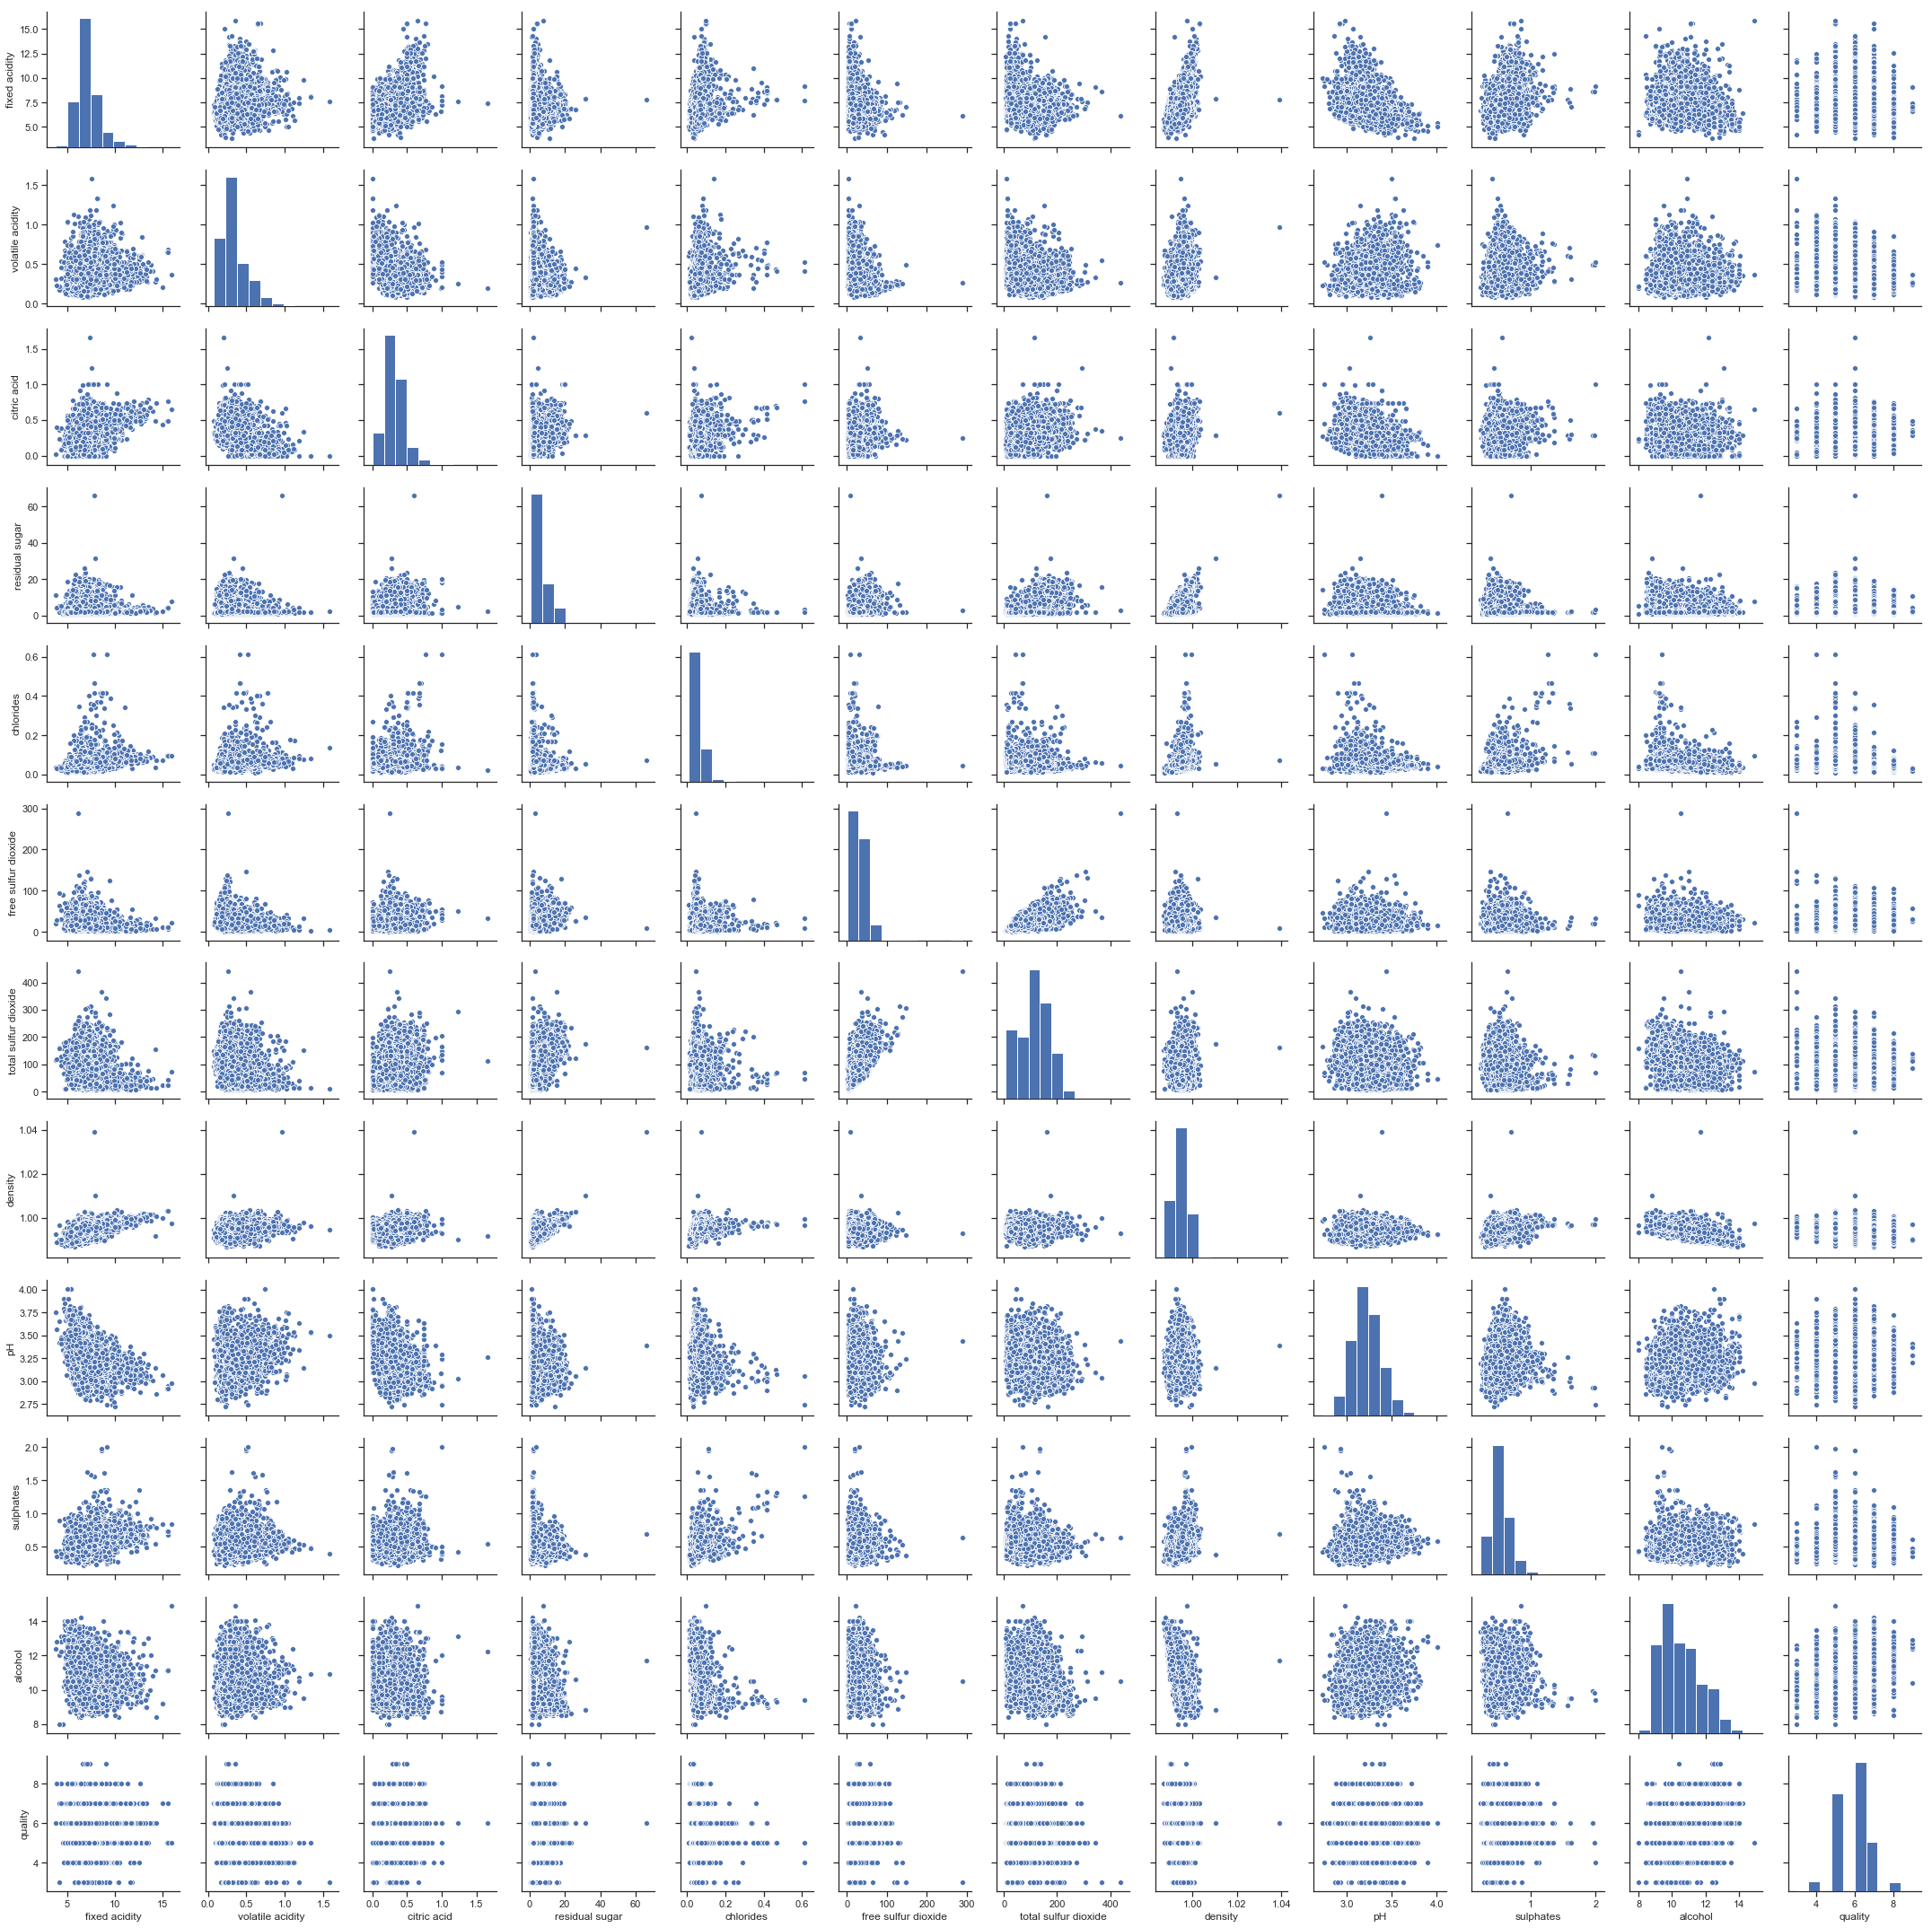

In [6]:
sns.set(style="ticks")
sns.pairplot(data)
plt.show()

In [7]:
pp.ProfileReport(data)

## 3. Implementación del código de K-means

In [8]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'quality'] ]
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   total sulfur dioxide  density    pH  sulphates  quality  
0                 170.0   1.0010  3.00       0.45        6  
1                 132.0   0.9940  3.30       0.49        6  
2                  97.0   0.9951  3.26       0.44        6  
3                 186.0   0.9956  3.19       0.40        6  
4                 186.0   0.9956  3.19       0.40        6

In [10]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

In [11]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[6.90935089e+00 2.87927640e-01 3.39433360e-01 7.20571961e+00
  4.85778132e-02 1.54858340e+02 9.94777409e-01 3.19098696e+00
  5.00343176e-01 5.81777068e+00]
 [7.63535427e+00 4.10697589e-01 2.90076698e-01 3.02352082e+00
  6.62702703e-02 6.20452885e+01 9.94585738e-01 3.25627465e+00
  5.73725347e-01 5.81921110e+00]]


In [20]:
md_k=pd.Series(kmeans.labels_)
data['k-means']=md_k
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  k-means  
0      8.8        6        0  
1      9.5        6        0  
2     10.1        6        1  
3      9.9        6        0  
4      9.9        6        0

In [21]:
data.groupby('k-means').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
k-means                                                                 
0             7.246393          0.343972     0.322576        6.099827   
1             7.119371          0.326377     0.306465        3.416887   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
k-means                                                                   
0         0.057981            33.469126            127.800591  0.995238   
1         0.050023            21.440252             78.537736  0.993027   

               pH  sulphates    alcohol   quality  
k-means                                            
0        3.220224   0.536411  10.311646  5.781944  
1        3.213182   0.515396  11.047788  5.930818

In [22]:
data.groupby('k-means').size()


k-means
0    4907
1    1590
dtype: int64

C:\Users\Andrea\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Andrea\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Andrea\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Andrea\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


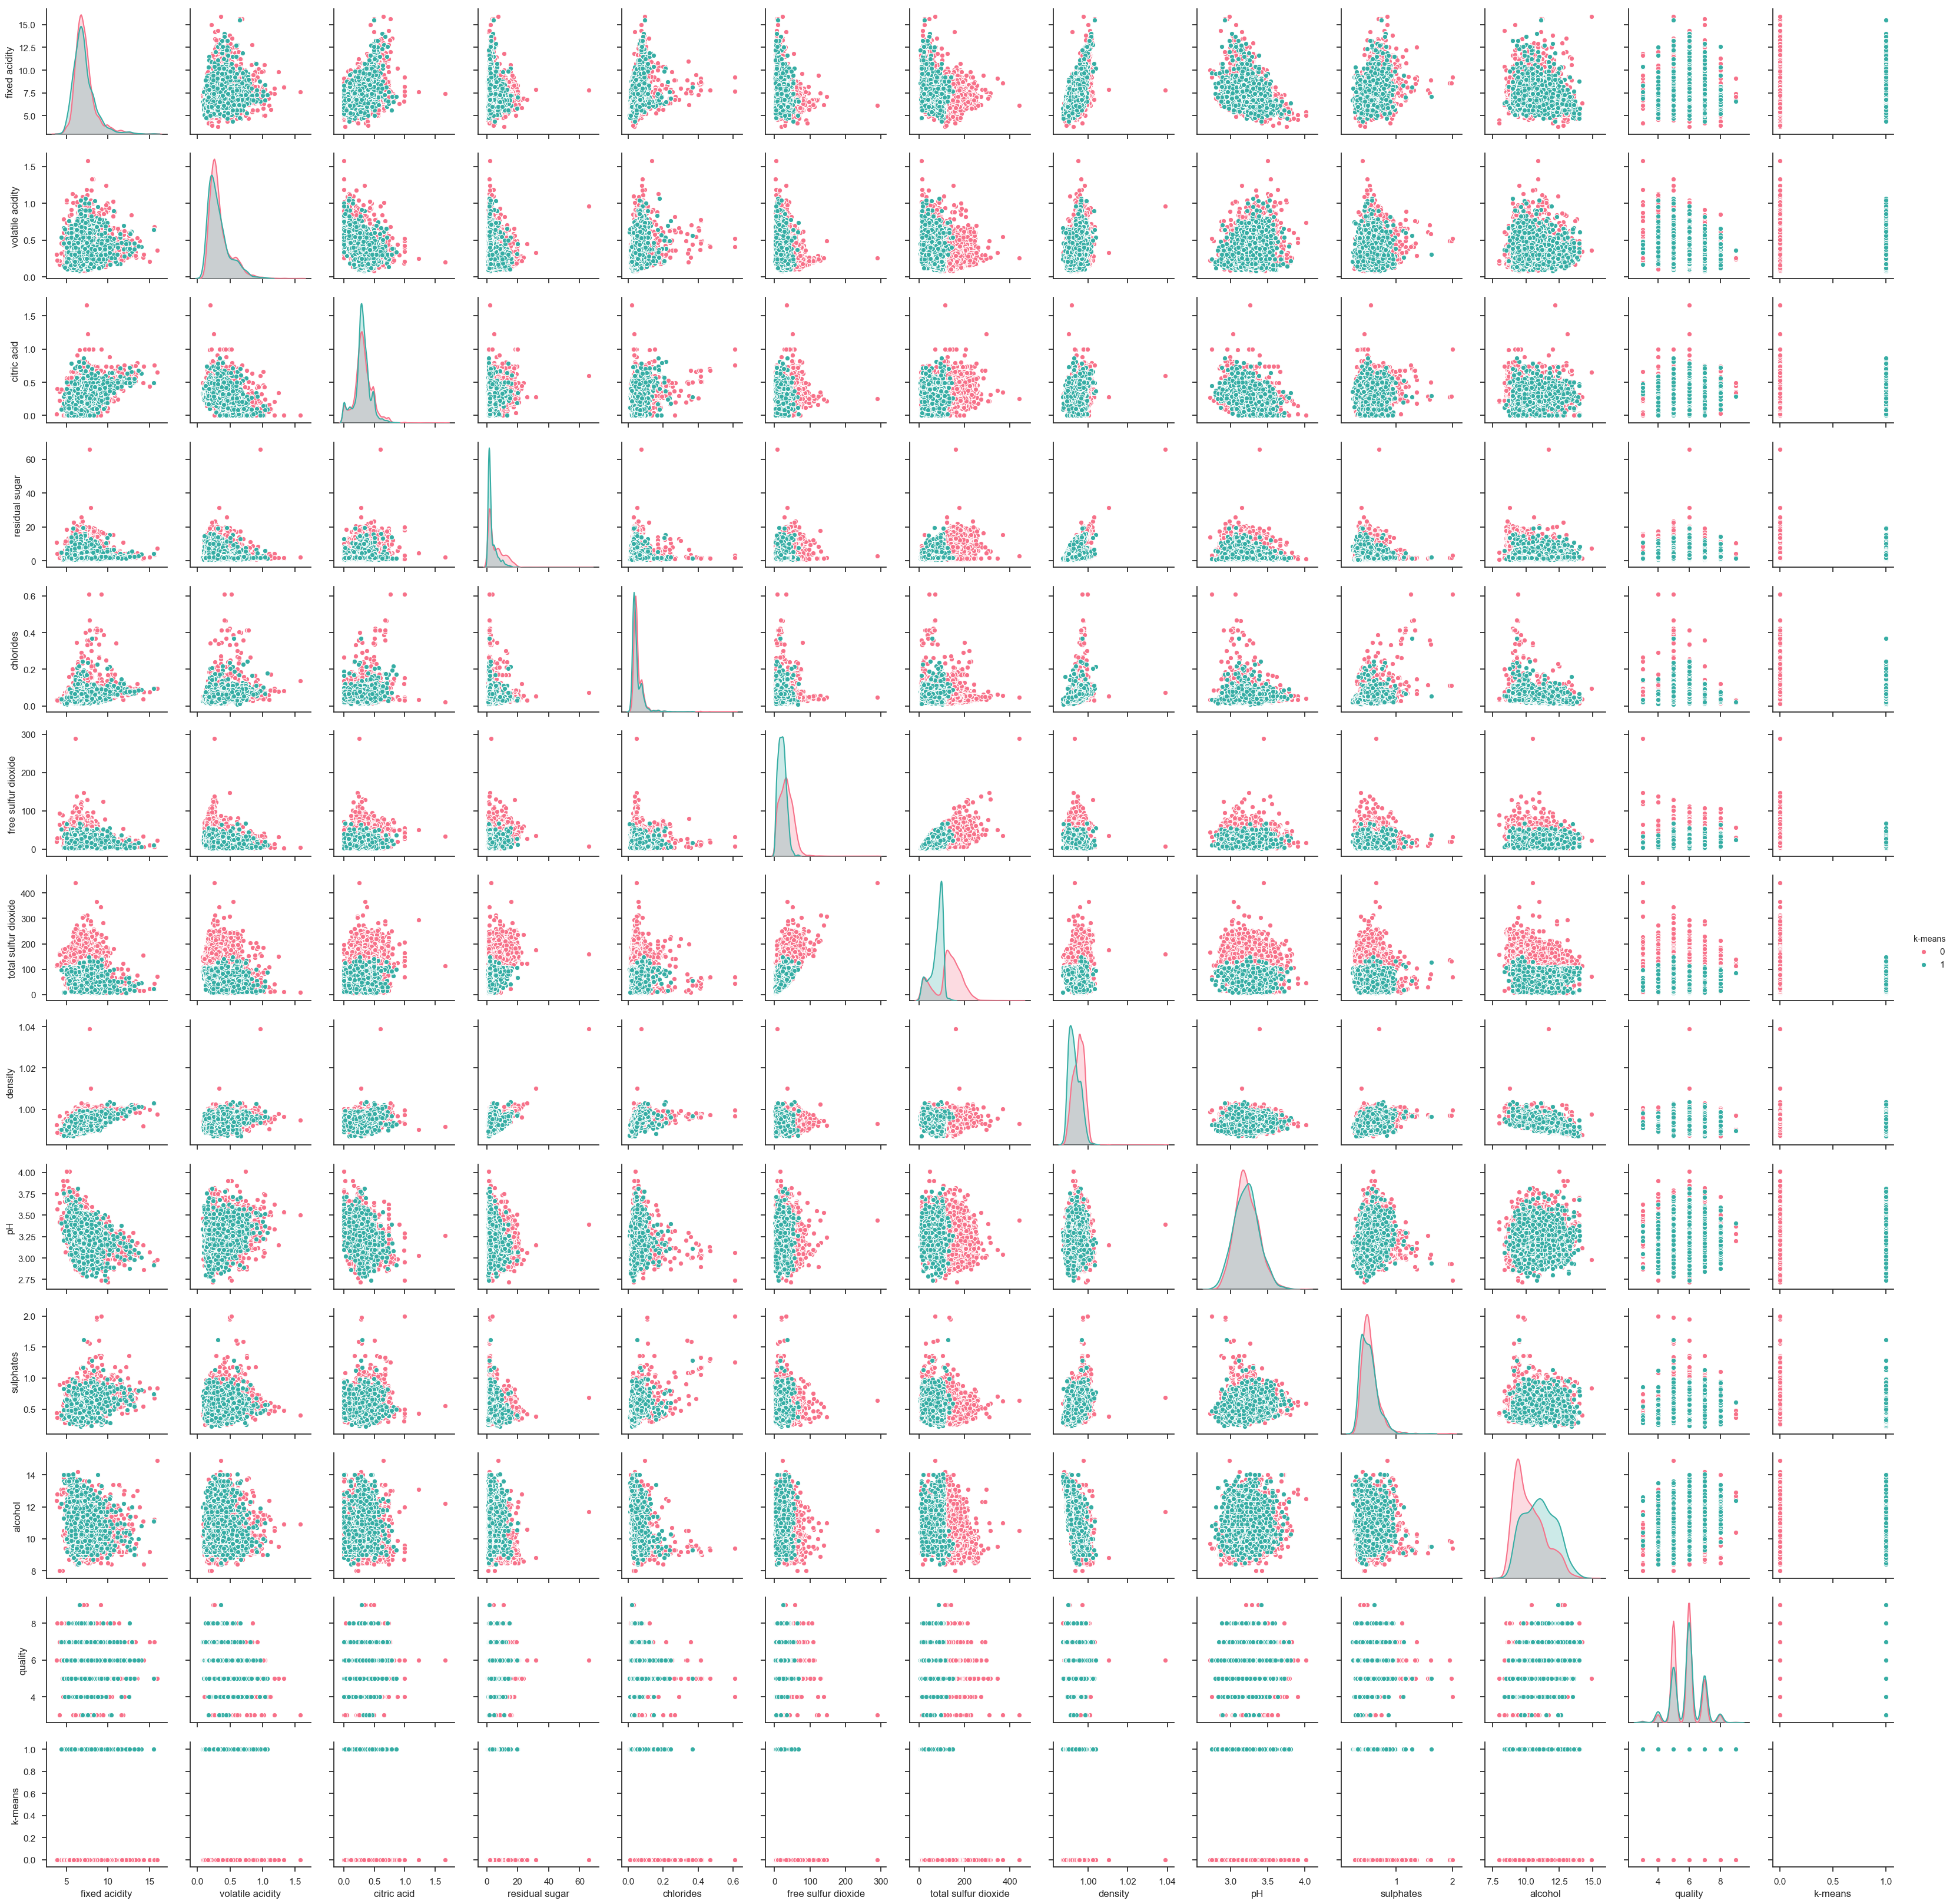

In [27]:
sns.pairplot(data, hue="k-means", palette="husl")
plt.show()

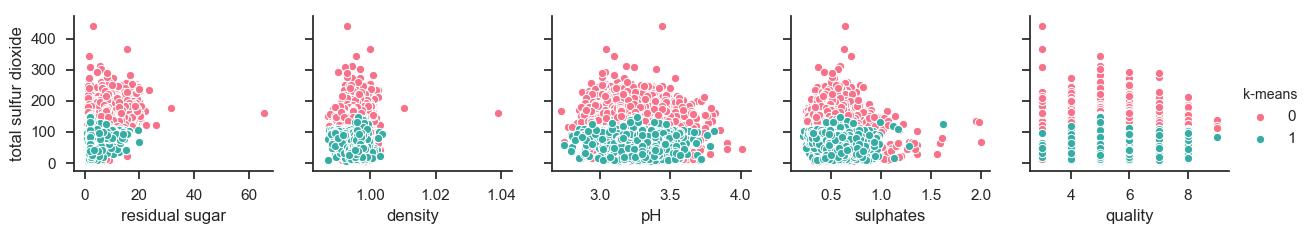

In [33]:
sns.pairplot(data, x_vars=[ 'residual sugar',
                            'density',  'pH', 'sulphates', 'quality'],
                 y_vars='total sulfur dioxide',hue="k-means", palette="husl")
plt.show()

## 4. Clasificando una nueva unidad

In [31]:
X_new = np.array([[45,92,5,7,7.4,1.5,6.3,2.6,3,2]]) #Nueva observación que se quiere clasificar
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[1]
